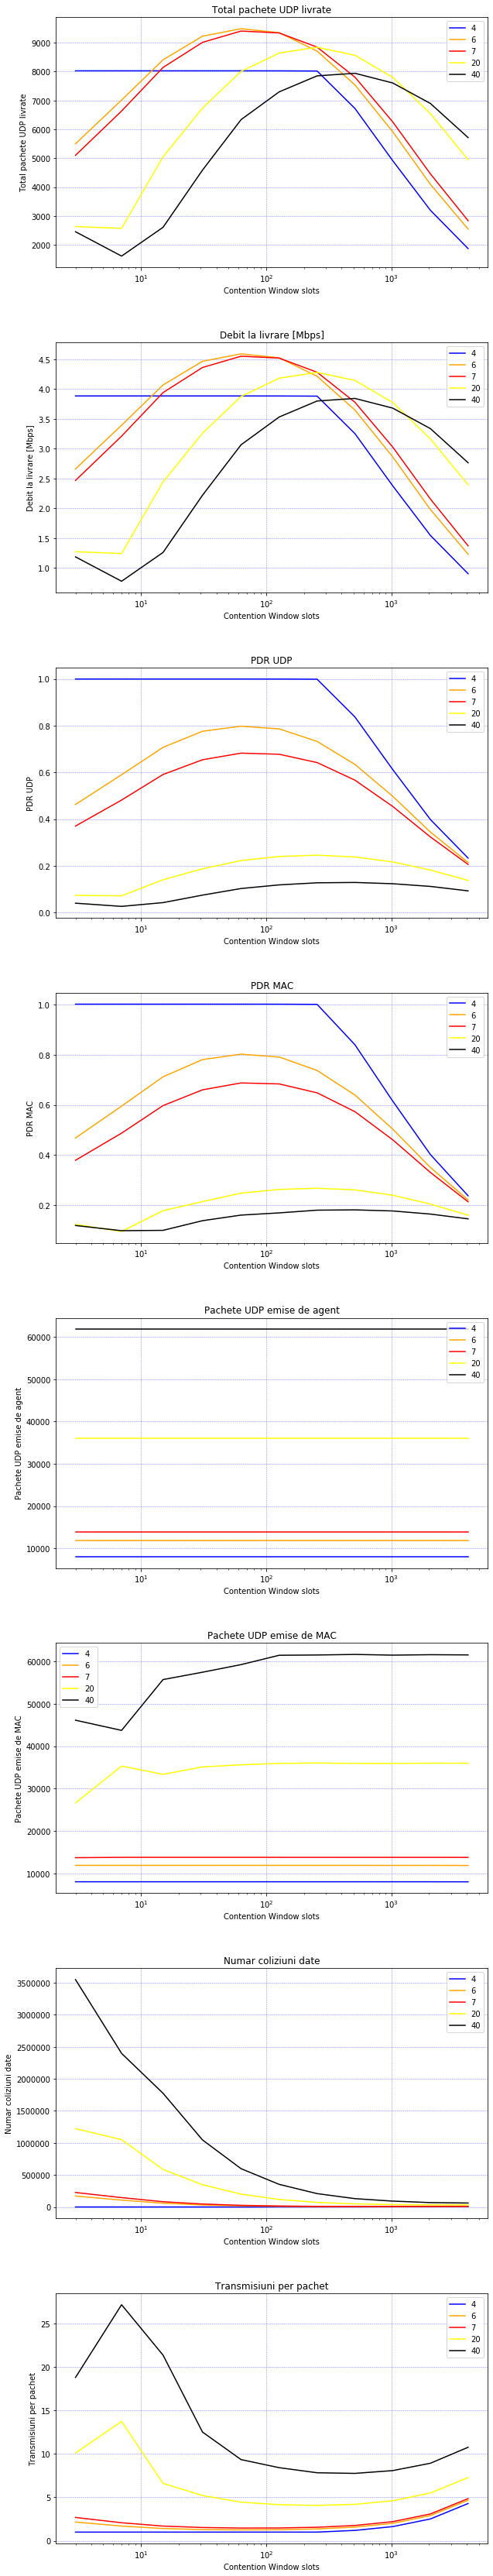

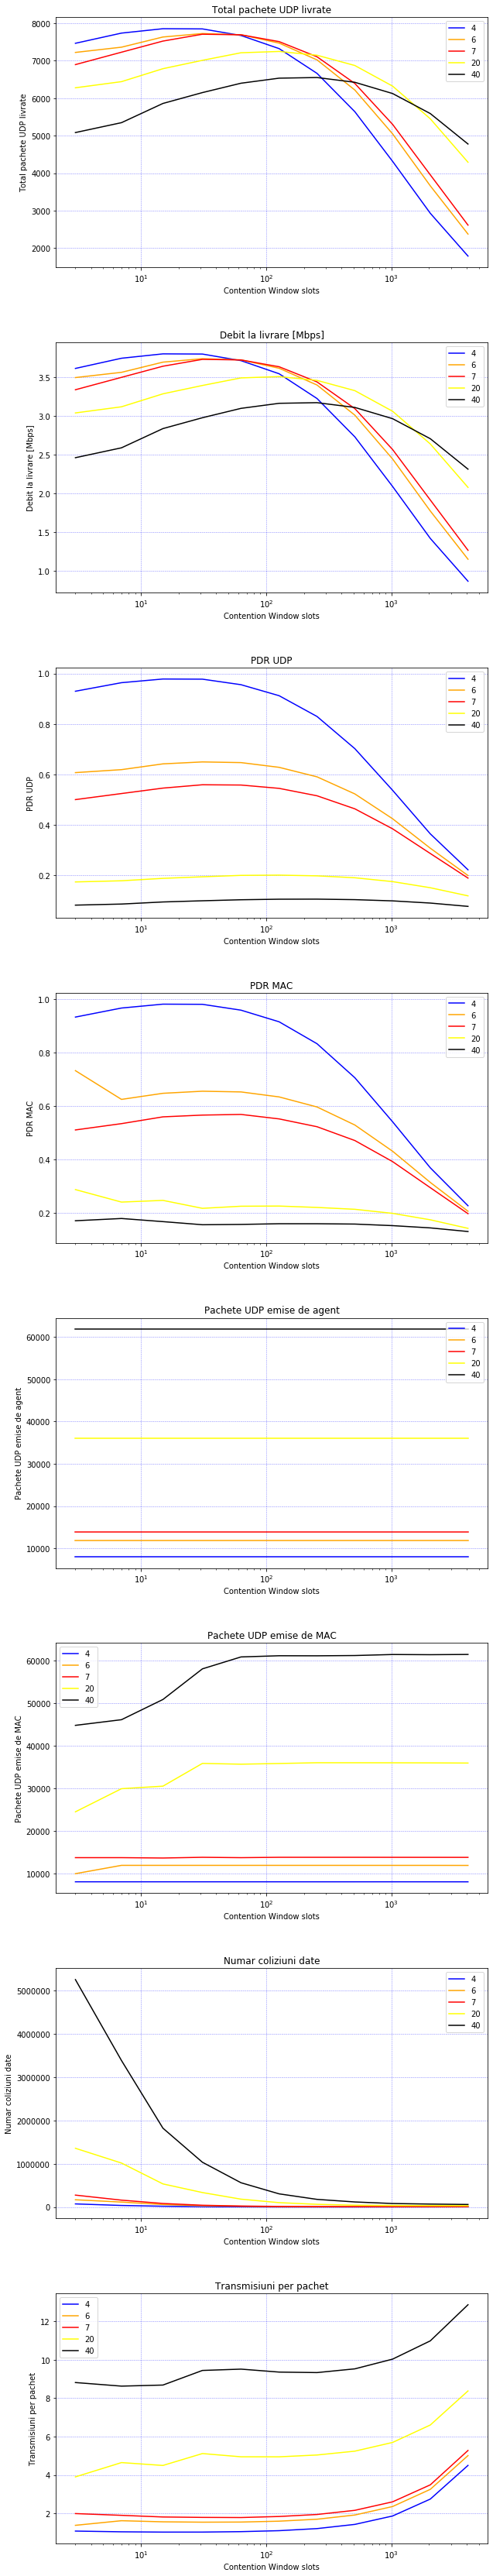

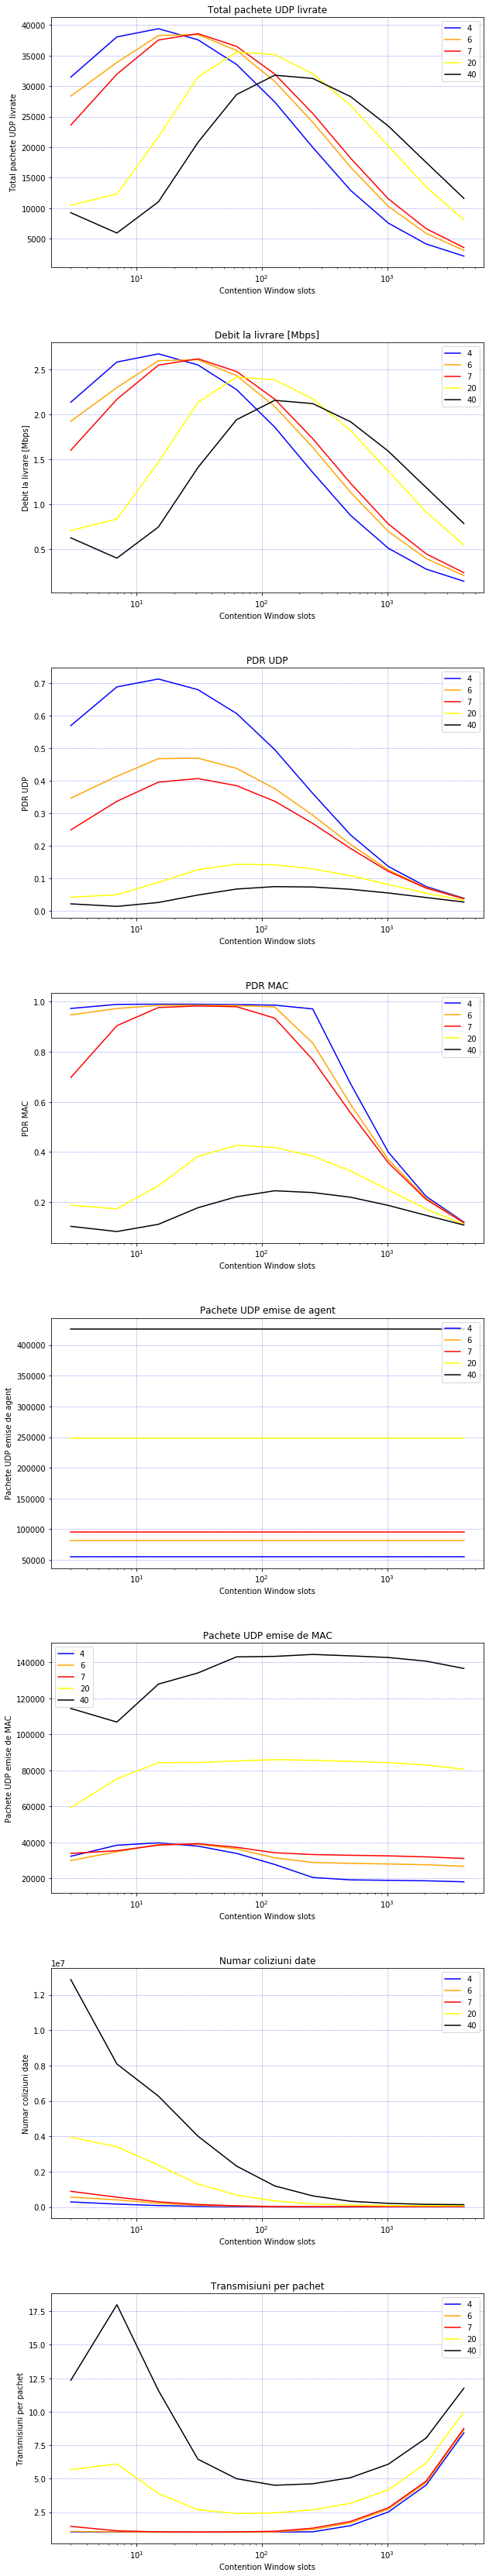

In [7]:
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

colors = [
    'blue', 'orange', 'red', 'yellow', 'black', 
    'purple', 'pink', 'brown', 'green', 'teal', 'coral', 'lightblue', 
    'lime', 'lavender', 'turquoise', 'darkgreen', 'tan', 'salmon', 'gold'
] 
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=colors) 


DATA_FILE = '/home/student/ns-3-dev/cw_stats.txt'
DATA_FILE_RTS = '/home/student/ns-3-dev/cw_stats_rts.txt'
DATA_FILE_SMALL = '/home/student/ns-3-dev/cw_stats_small.txt'

columns = ['sz', 'cw', 'sent_agt', 'recv_agt', 'col_cbr', 'sent_mac', 'recv_mac', 'avgTput']

sim_data = np.genfromtxt(DATA_FILE, delimiter=' ', names=columns)
sim_data_rts = np.genfromtxt(DATA_FILE_RTS, delimiter=' ', names=columns)
sim_data_small = np.genfromtxt(DATA_FILE_SMALL, delimiter=' ', names=columns)


def plot_metrics(sim_data, label=''):
    data = copy.deepcopy(sim_data)

    fig, ax = plt.subplots(8, 1, figsize=(10,60))

    # Total pachete UDP livrate
    axis = ax[0]
    axis.set_xscale('log')
    axis.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    axis.set_xlabel('Contention Window slots')
    axis.set_ylabel('Total pachete UDP livrate')
    axis.set_title('Total pachete UDP livrate')

    axis.plot(data['cw'][:11], data['recv_agt'][:11], label=int(data['sz'][0]))
    axis.plot(data['cw'][11:22], data['recv_agt'][11:22], label=int(data['sz'][11]))
    axis.plot(data['cw'][22:33], data['recv_agt'][22:33], label=int(data['sz'][22]))
    axis.plot(data['cw'][33:44], data['recv_agt'][33:44], label=int(data['sz'][33]))
    axis.plot(data['cw'][44:55], data['recv_agt'][44:55], label=int(data['sz'][44]))
    axis.legend()

    # Debit la livrare
    axis = ax[1]
    axis.set_xscale('log')
    axis.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    axis.set_xlabel('Contention Window slots')
    axis.set_ylabel('Debit la livrare [Mbps]')
    axis.set_title('Debit la livrare [Mbps]')

    payload_size = 1512
    if label == 'small':
        payload_size = 212

    data_points = [data_point * payload_size * 8 / (25 * 10**6) for data_point in data['recv_agt']]
    axis.plot(data['cw'][:11], data_points[:11], label=int(data['sz'][0]))
    axis.plot(data['cw'][11:22], data_points[11:22], label=int(data['sz'][11]))
    axis.plot(data['cw'][22:33], data_points[22:33], label=int(data['sz'][22]))
    axis.plot(data['cw'][33:44], data_points[33:44], label=int(data['sz'][33]))
    axis.plot(data['cw'][44:55], data_points[44:55], label=int(data['sz'][44]))
    axis.legend()

    # PDR UDP
    axis = ax[2]
    axis.set_xscale('log')
    axis.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    axis.set_xlabel('Contention Window slots')
    axis.set_ylabel('PDR UDP')
    axis.set_title('PDR UDP')

    data_points = [recv_agt / sent_agt for recv_agt, sent_agt in zip(data['recv_agt'], data['sent_agt'])]
    axis.plot(data['cw'][:11], data_points[:11], label=int(data['sz'][0]))
    axis.plot(data['cw'][11:22], data_points[11:22], label=int(data['sz'][11]))
    axis.plot(data['cw'][22:33], data_points[22:33], label=int(data['sz'][22]))
    axis.plot(data['cw'][33:44], data_points[33:44], label=int(data['sz'][33]))
    axis.plot(data['cw'][44:55], data_points[44:55], label=int(data['sz'][44]))
    axis.legend()

    # PDR MAC
    axis = ax[3]
    axis.set_xscale('log')
    axis.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    axis.set_xlabel('Contention Window slots')
    axis.set_ylabel('PDR MAC')
    axis.set_title('PDR MAC')

    data_points = [recv_agt / sent_mac for recv_agt, sent_mac in zip(data['recv_mac'], data['sent_mac'])]
    axis.plot(data['cw'][:11], data_points[:11], label=int(data['sz'][0]))
    axis.plot(data['cw'][11:22], data_points[11:22], label=int(data['sz'][11]))
    axis.plot(data['cw'][22:33], data_points[22:33], label=int(data['sz'][22]))
    axis.plot(data['cw'][33:44], data_points[33:44], label=int(data['sz'][33]))
    axis.plot(data['cw'][44:55], data_points[44:55], label=int(data['sz'][44]))
    axis.legend()

    # Pachete UDP emise de agent
    axis = ax[4]
    axis.set_xscale('log')
    axis.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    axis.set_xlabel('Contention Window slots')
    axis.set_ylabel('Pachete UDP emise de agent')
    axis.set_title('Pachete UDP emise de agent')

    axis.plot(data['cw'][:11], data['sent_agt'][:11], label=int(data['sz'][0]))
    axis.plot(data['cw'][11:22], data['sent_agt'][11:22], label=int(data['sz'][11]))
    axis.plot(data['cw'][22:33], data['sent_agt'][22:33], label=int(data['sz'][22]))
    axis.plot(data['cw'][33:44], data['sent_agt'][33:44], label=int(data['sz'][33]))
    axis.plot(data['cw'][44:55], data['sent_agt'][44:55], label=int(data['sz'][44]))
    axis.legend()

    # Pachete UDP emise de MAC
    axis = ax[5]
    axis.set_xscale('log')
    axis.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    axis.set_xlabel('Contention Window slots')
    axis.set_ylabel('Pachete UDP emise de MAC')
    axis.set_title('Pachete UDP emise de MAC')

    axis.plot(data['cw'][:11], data['sent_mac'][:11], label=int(data['sz'][0]))
    axis.plot(data['cw'][11:22], data['sent_mac'][11:22], label=int(data['sz'][11]))
    axis.plot(data['cw'][22:33], data['sent_mac'][22:33], label=int(data['sz'][22]))
    axis.plot(data['cw'][33:44], data['sent_mac'][33:44], label=int(data['sz'][33]))
    axis.plot(data['cw'][44:55], data['sent_mac'][44:55], label=int(data['sz'][44]))
    axis.legend()

    # Numar coliziuni la nivel de date
    axis = ax[6]
    axis.set_xscale('log')
    axis.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    axis.set_xlabel('Contention Window slots')
    axis.set_ylabel('Numar coliziuni date')
    axis.set_title('Numar coliziuni date')

    axis.plot(data['cw'][:11], data['col_cbr'][:11], label=int(data['sz'][0]))
    axis.plot(data['cw'][11:22], data['col_cbr'][11:22], label=int(data['sz'][11]))
    axis.plot(data['cw'][22:33], data['col_cbr'][22:33], label=int(data['sz'][22]))
    axis.plot(data['cw'][33:44], data['col_cbr'][33:44], label=int(data['sz'][33]))
    axis.plot(data['cw'][44:55], data['col_cbr'][44:55], label=int(data['sz'][44]))
    axis.legend()

    # Transmisiuni per pachet
    axis = ax[7]
    axis.set_xscale('log')
    axis.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    axis.set_xlabel('Contention Window slots')
    axis.set_ylabel('Transmisiuni per pachet')
    axis.set_title('Transmisiuni per pachet')

    data_points = [sent_mac / recv_agt for sent_mac, recv_agt in zip(data['sent_mac'], data['recv_agt'])]
    axis.plot(data['cw'][:11], data_points[:11], label=int(data['sz'][0]))
    axis.plot(data['cw'][11:22], data_points[11:22], label=int(data['sz'][11]))
    axis.plot(data['cw'][22:33], data_points[22:33], label=int(data['sz'][22]))
    axis.plot(data['cw'][33:44], data_points[33:44], label=int(data['sz'][33]))
    axis.plot(data['cw'][44:55], data_points[44:55], label=int(data['sz'][44]))
    axis.legend()
    
    fig.subplots_adjust(hspace=0.3)
    figure_name = 'cw_metrics.png'
    if label:
        figure_name = 'cw_metrics_%s.png' % label
    plt.savefig(figure_name)
    plt.show()

    
if __name__ == '__main__':
    plot_metrics(sim_data)
    plot_metrics(sim_data_rts, label='rts') 
    plot_metrics(sim_data_small, label='small')